In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display


In [6]:
PATH_ELE="../Dati/InterCalibrazione.xlsx"
PATH_MARTI="InterCalibrazione-2.xlsx"
data=pd.read_excel(PATH_MARTI, sheet_name='batch' )
display(data)

,ch,val_1,err_stat_1,err_sist_1,val_2,err_stat_2,err_sist_2,val_3,err_stat_3,err_sist_3,...,err_stat_4,err_sist_4,media,std,drift relativo,Drift relativo [%],Range,val_5,err_stat_5,err_sist_5
0,0,-312.74,0.22,2.3,-312.4,0.3,3.5,-312.90,0.30,2.0,...,0.22,1.10,-311.7725,1.826935,0.005860,0.585983,L,-310.17,0.22,1.64
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,-335.93,0.25,1.5,-336.6,2.0,1.4,-336.60,0.60,1.4,...,0.53,2.60,-337.2250,1.725814,0.005118,0.511769,L,-339.30,0.31,1.70
3,3,-957.88,0.94,6.2,-955.0,1.0,2.9,-958.27,0.86,8.0,...,1.10,1.20,-957.3625,1.586577,0.001657,0.165724,H,-959.35,0.96,5.20
4,4,-1444.99,0.95,2.2,-1467.5,0.8,3.1,-1474.96,0.73,4.0,...,1.20,4.80,-1467.7125,16.482122,0.011230,1.122980,H,-1487.60,0.96,2.50
5,5,-1529.10,1.30,5.3,-1530.0,1.0,8.0,-1536.94,0.92,7.0,...,1.10,6.90,-1533.2850,4.328922,0.002823,0.282330,H,-1541.58,1.28,5.08
6,6,-272.68,0.63,4.2,-281.8,0.7,3.6,-280.22,0.54,6.0,...,1.50,4.50,-279.7500,5.003692,0.017886,1.788630,L,-280.96,0.67,2.93
7,7,-1671.30,1.20,1.0,-1695.0,1.0,0.5,-1697.00,1.00,2.0,...,1.20,5.30,-1695.8750,19.980553,0.011782,1.178185,H,-1730.70,1.20,6.60
8,8,-1119.82,0.71,1.5,-1140.9,0.7,3.5,-1155.02,0.66,2.0,...,0.73,2.40,-1143.8150,17.855497,0.015610,1.561048,H,-1161.20,0.75,0.81
9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
a=data["err_stat_1"][2]
print(type(a))

<class 'numpy.float64'>


In [8]:
channels = [0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 14, 15]
channel_idx = [0, -1, 1, 2, 3, 4, 5, 6, 7, -1, 8, 9, -1, -1, 10, 11]

ch=np.zeros((12,5))
ch_err=np.zeros((12,5))

for j in channels:
    print(j)
    for i in range(0,5):
        
        ch[channel_idx[j]][i] = data["val_"+str(i+1)][j]
        ch_err[channel_idx[j]][i] = np.sqrt(data["err_stat_"+str(i+1)][j]**2 + data["err_sist_"+str(i+1)][j]**2)

print(ch)

0
2
3
4
5
6
7
8
10
11
14
15
[[ -312.74  -312.4   -312.9   -309.05  -310.17]
 [ -335.93  -336.6   -336.6   -339.77  -339.3 ]
 [ -957.88  -955.    -958.27  -958.3   -959.35]
 [-1444.99 -1467.5  -1474.96 -1483.4  -1487.6 ]
 [-1529.1  -1530.   -1536.94 -1537.1  -1541.58]
 [ -272.68  -281.8   -280.22  -284.3   -280.96]
 [-1671.3  -1695.   -1697.   -1720.2  -1730.7 ]
 [-1119.82 -1140.9  -1155.02 -1159.52 -1161.2 ]
 [ -383.81  -386.6   -386.84  -386.95  -387.1 ]
 [ -555.    -554.6   -548.7   -546.74  -545.71]
 [ -529.54  -533.6   -530.49  -526.6   -528.71]
 [ -802.4   -805.    -800.01  -798.23  -796.46]]


In [9]:
print(ch[0])

[-312.74 -312.4  -312.9  -309.05 -310.17]


0
2
3
4
5
6
7
8
10
11
14
15


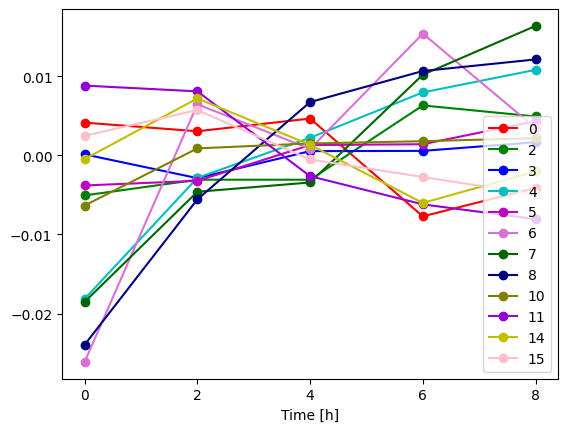

In [10]:
channels = [0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 14, 15]
channel_idx = [0, -1, 1, 2, 3, 4, 5, 6, 7, -1, 8, 9, -1, -1, 10, 11]

colors=['r', 'g', 'b', 'c', 'm', 'orchid', 'darkgreen', 'navy', 'olive', 'darkviolet', 'y', 'pink' ]

plt.xticks([0, 2, 4, 6, 8])
plt.xlabel("Time [h]")


for j in channels:
    print(j)
    plt.plot(np.arange(5) * 2, (ch[channel_idx[j]] - np.mean(ch[channel_idx[j]]))/np.mean(ch[channel_idx[j]]), 'o-', color=colors[channel_idx[j]], label='{}'.format(j))
    plt.legend()
#plt.plot(np.arange(4)*2, np.array(ch[channel_idx[7]]-np.array(ch[channel_idx[7]]))/np.mean(ch[channel_idx[7]]), '-o')
#plt.plot(np.arange(4)*2, np.array(ch[channel_idx[15]])/np.mean(ch[channel_idx[15]]), '-o')

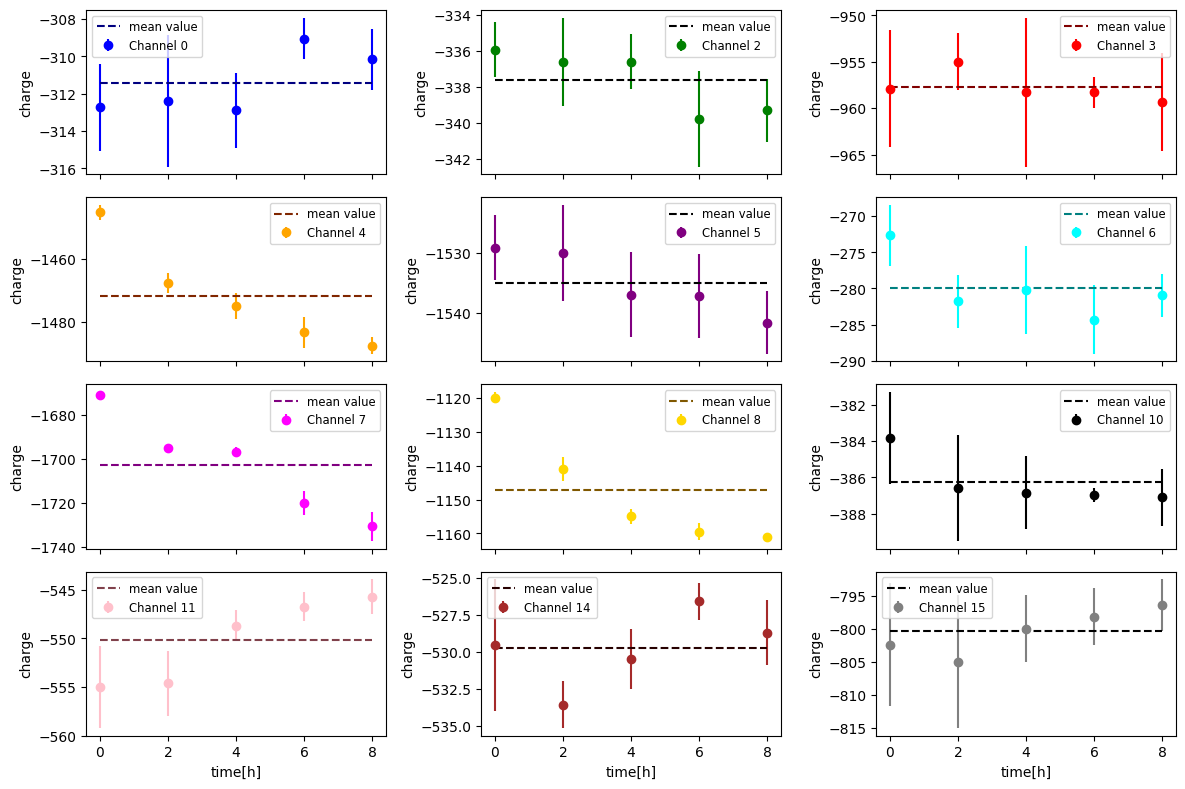

In [11]:
# Define drift list
#drift = [4, 6, 7, 8]

import matplotlib.colors as mcolors

channels = [0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 14, 15]
xval=np.array([0,2,4,6,8])

# Define colors for each subplot
colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta', 'gold', 'black', 'pink', 'brown', 'gray']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 8), sharex=True)

# Iterate over each element in channels
for idx, (j, color) in enumerate(zip(channels, colors)):
    # Calculate subplot row and column
    row = idx // 3
    col = idx % 3
    
    # Plot error bars on the corresponding subplot with different color
    axes[row, col].errorbar(np.arange(5) * 2, ch[channel_idx[j]], yerr=ch_err[channel_idx[j]], ls='', marker='o', color=color, label='Channel {}'.format(j))

    dark_color = mcolors.to_rgb(color)
    dark_color = [max(0, c - 0.5) for c in dark_color]  

    axes[row, col].plot(xval, 0*xval + np.mean(ch[channel_idx[j]]), ls='--', color=dark_color, label = 'mean value')
    #axes[row, col].set_xlabel('time [h]')  # Add x label for each subplot
    axes[row, col].set_ylabel('charge')
    axes[row, col].legend(fontsize='small')  # Add legend for each subplot
    
   # axes[row, col].set_title('Channel {}'.format(j))  # Set title for each subplot

axes[-1, 0].set_xlabel('time[h]') 
axes[-1, 1].set_xlabel('time[h]') 
axes[-1, 2].set_xlabel('time[h]') 
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


(-15.0, 25.0)

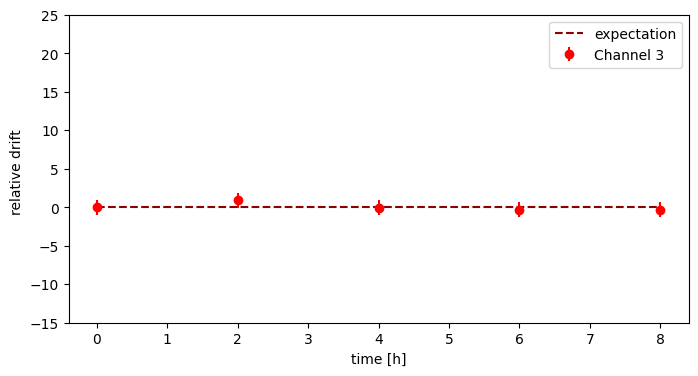

In [34]:
plt.figure(figsize=(8,4))
plt.errorbar(np.arange(5) * 2, (ch[channel_idx[3]]-np.mean(ch[channel_idx[3]]))/ch_err[channel_idx[3]], yerr=1, ls='', marker='o', color='red', label='Channel 3')
plt.plot(xval, 0*xval, ls='--', color='darkred', label = 'expectation')
 #axes[row, col].set_xlabel('time [h]')  # Add x label for each subplot
plt.ylabel('relative drift ')
plt.xlabel('time [h]')
plt.legend() 
plt.ylim(-15,25) 

<class 'list'>


In [41]:
list=[0,2,3,4,5,6,7,8,10,11,14,15]
for i in list:
    a=(ch[channel_idx[i]]-np.mean(ch[channel_idx[i]]))/ch_err[channel_idx[i]]
    print(i, np.std(a))


0 1.0681302252687197
2 0.8288745040691917
3 0.448893301432709
4 5.747527694417533
5 0.8119743136430563
6 0.9096090148778839
7 8.833812148332791
8 9.712170202661543
10 0.8779946202162912
11 1.6386750182870842
14 1.5924618472490735
15 0.5201238751961283


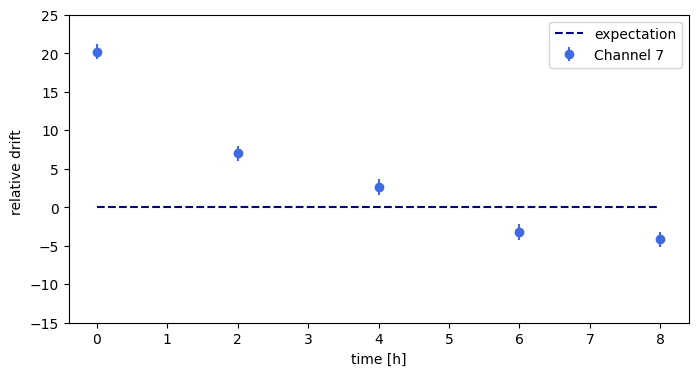

In [35]:
plt.figure(figsize=(8,4))
plt.errorbar(np.arange(5) * 2, (ch[channel_idx[7]]-np.mean(ch[channel_idx[7]]))/ch_err[channel_idx[7]], yerr=1,ls='', marker='o', color='royalblue', label='Channel 7')
plt.plot(xval, 0*xval , ls='--', color='navy', label = 'expectation')
 #axes[row, col].set_xlabel('time [h]')  # Add x label for each subplot
plt.ylabel('relative drift ')
plt.ylim(-15,25)
plt.xlabel('time [h]')
plt.legend()  


4
6
7
8


/var/folders/17/9cj0cbps58xbmrl2zpj6hv2h0000gn/T/ipykernel_50017/484183505.py:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(np.arange(5) * 2,  (ch[channel_idx[j]] - np.mean(ch[channel_idx[j]]))/np.mean(ch[channel_idx[j]]), 'o-', marker='o',label='{}'.format(j))


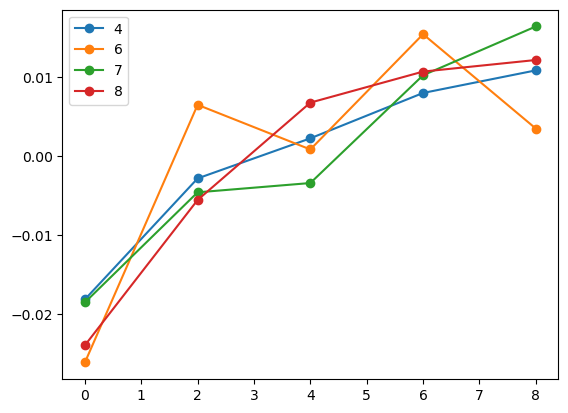

0
2
3
5
10
11
14
15


(-0.02, 0.02)

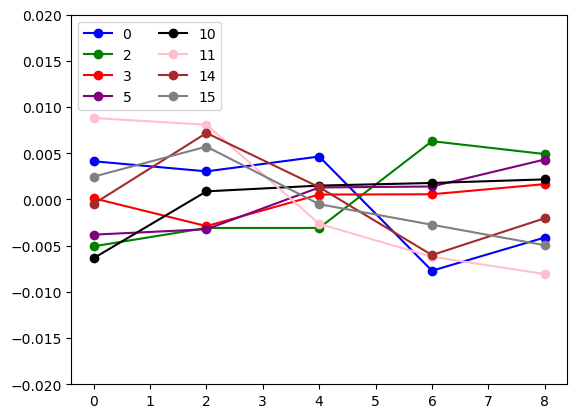

In [ ]:
drift=[4,6, 7, 8, ]
no_drift=[0, 2, 3, 5, 10, 11, 14, 15]

for j in drift:
    print(j)
    plt.plot(np.arange(5) * 2,  (ch[channel_idx[j]] - np.mean(ch[channel_idx[j]]))/np.mean(ch[channel_idx[j]]), 'o-', marker='o',label='{}'.format(j))
    plt.legend()

plt.show()

for j in no_drift:
    print(j)
    plt.plot(np.arange(5) * 2, (ch[channel_idx[j]] - np.mean(ch[channel_idx[j]]))/np.mean(ch[channel_idx[j]]), 'o-', color=colors[channel_idx[j]], label='{}'.format(j))
    plt.legend(loc='upper left', ncol=2)
plt.ylim(-0.02, 0.02)